 **Importing Libraries**

In [13]:
import numpy as np
import pandas as pd
# from numpy import math
import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams

!pip install pymysql
import pymysql
from sqlalchemy import create_engine
from sqlalchemy.pool import NullPool

import warnings
warnings.filterwarnings('ignore')

**DataSet Loading**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
# Load Dataset
df = pd.read_excel('/content/drive/My Drive/Airbnb_Open_Data.xlsx')

## **2. Understanding Your Variables**

In [14]:
# Dataset Columns
print("Dataset columns:")
display(df.columns)

Dataset columns:


Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [15]:
# Dataset Shape
print("Dataset shape:")
display(df.shape)

Dataset shape:


(102599, 26)

## **3. Data Wrangling**

Data Wrangling Code

In [19]:
# Filling missing values in 'NAME' and 'host name'
df['NAME'].fillna('Unknown', inplace=True)
df['host name'].fillna('Unknown', inplace=True)

# Filling missing values in 'reviews per month' with 0
df['reviews per month'].fillna(0, inplace=True)

# Display the number of remaining missing values to confirm the changes
print("Missing values after handling:")
display(df.isnull().sum())

Missing values after handling:


,0
id,0
NAME,0
host id,0
host_identity_verified,289
host name,0
neighbourhood group,29
neighbourhood,16
lat,8
long,8
country,532


# **4. Data Visualization, Storytelling & Experimenting with charts: Understand the relationships between variables**

Chart - 1- Pie Chart on Dependent Variable

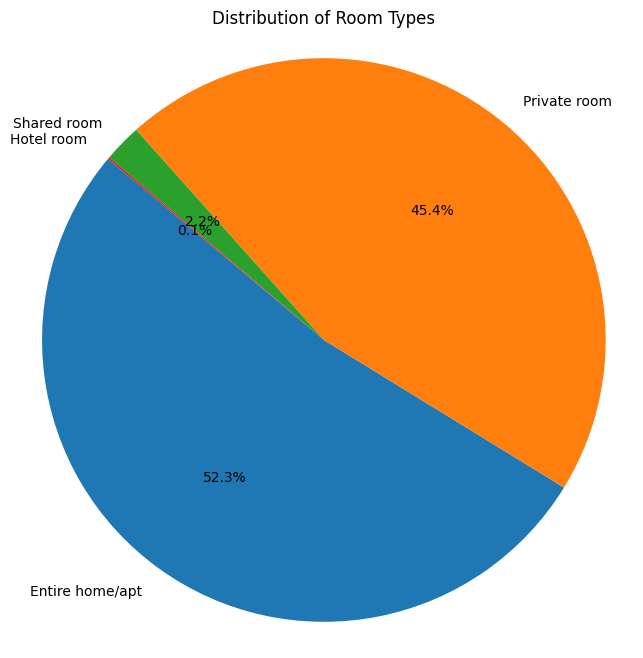

In [21]:
# Pie Chart on Dependent Variable (Room Type Distribution)

# Count the occurrences of each room type
room_type_counts = df['room type'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(room_type_counts, labels=room_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Room Types')
plt.axis('equal')
plt.show()

Chart - 2 - Room Type vs. Price (Bivariate with Categorical - Numerical)

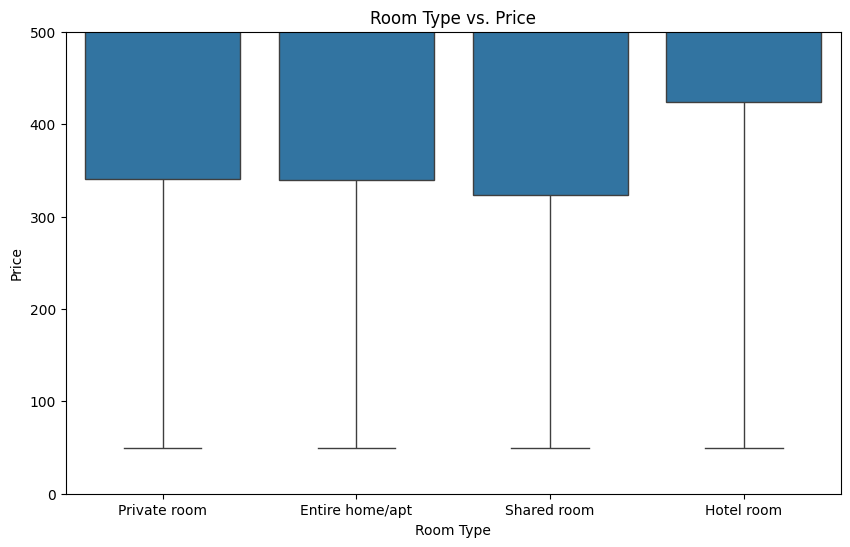

In [23]:
# Bivariate Analysis: Room Type vs. Price (Box Plot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='room type', y='price', data=df)
plt.title('Room Type vs. Price')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.ylim(0, 500)
plt.show()

Chart - 3 Top 10 Neighbourhood - Distribution of Listings

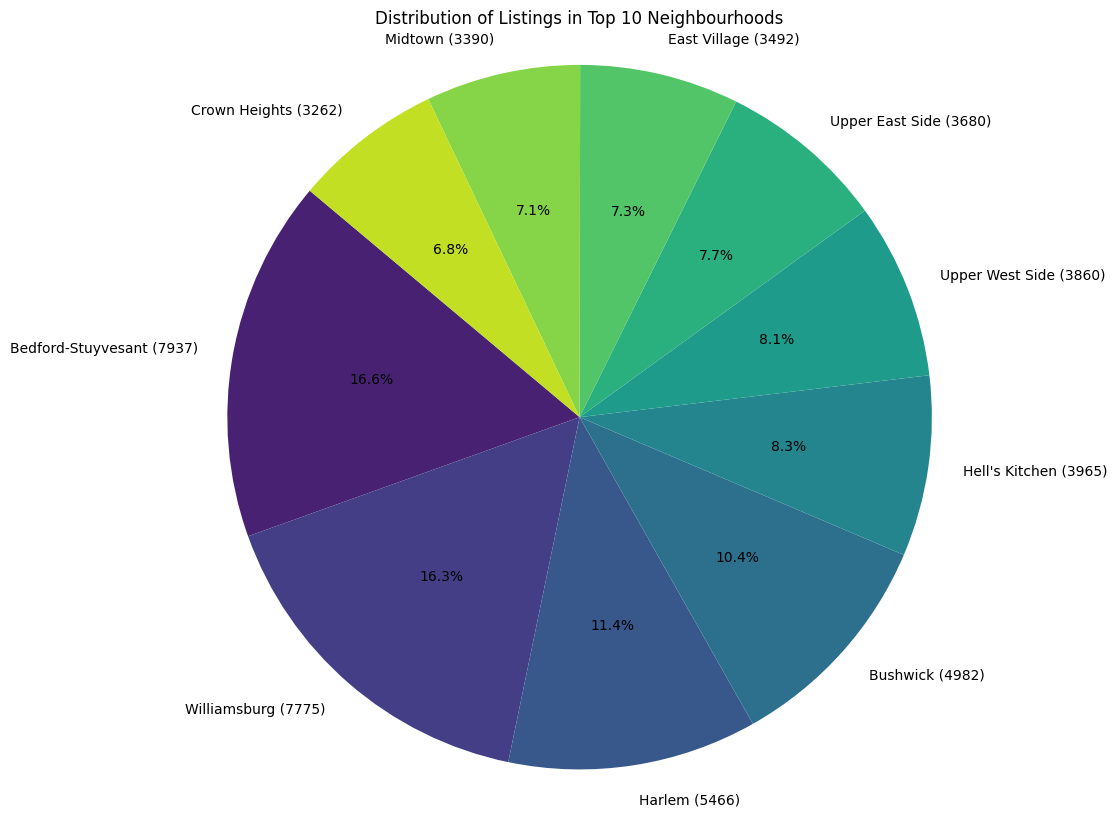

In [26]:
# Calculate the top 10 neighborhoods by listing count
top_10_neighbourhoods = df['neighbourhood'].value_counts().nlargest(10)

# Custom labels with name + count
labels = [f'{neigh} ({count})' for neigh, count in zip(top_10_neighbourhoods.index, top_10_neighbourhoods.values)]

# Create a pie chart
plt.figure(figsize=(10, 10))
plt.pie(top_10_neighbourhoods.values, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(top_10_neighbourhoods)))
plt.title('Distribution of Listings in Top 10 Neighbourhoods')
plt.axis('equal')
plt.show()

Chart - 4 - Neighbourhood Group vs Average Price

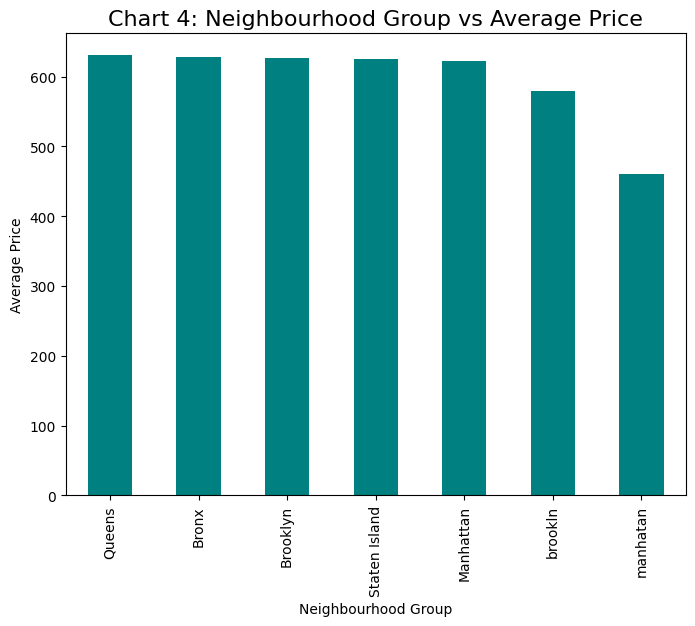

In [28]:
plt.figure(figsize=(8,6))
df.groupby('neighbourhood group')['price'].mean().sort_values(ascending=False).plot(kind='bar', color='teal')
plt.title("Chart 4: Neighbourhood Group vs Average Price", fontsize=16)
plt.xlabel("Neighbourhood Group")
plt.ylabel("Average Price")
plt.show()

## Chart - 5 -Room Type vs Number of Reviews

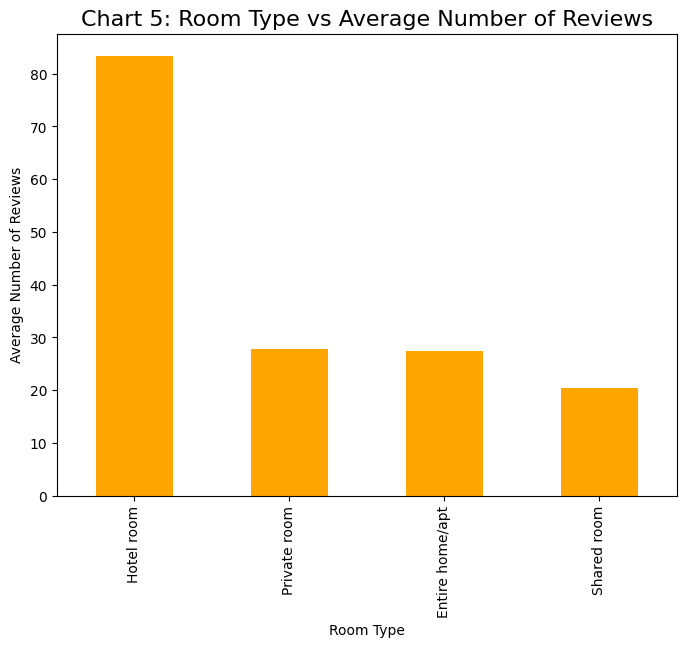

In [29]:
plt.figure(figsize=(8,6))
df.groupby('room type')['number of reviews'].mean().sort_values(ascending=False).plot(kind='bar', color='orange')
plt.title("Chart 5: Room Type vs Average Number of Reviews", fontsize=16)
plt.xlabel("Room Type")
plt.ylabel("Average Number of Reviews")
plt.show()

# Chart-6: Reviews per Month(Univariate + Bivariate)

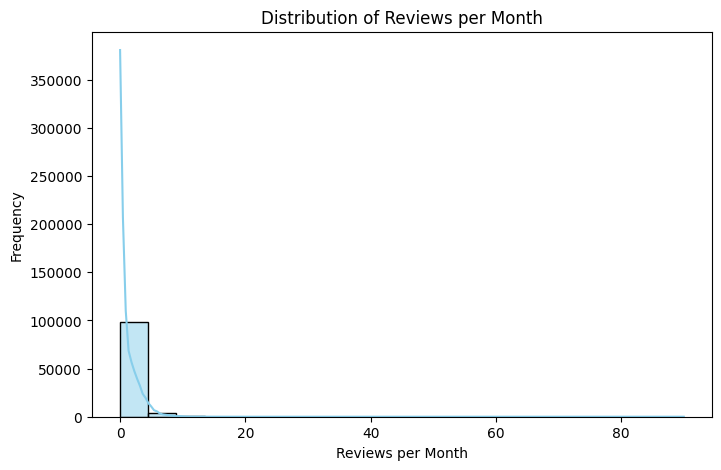

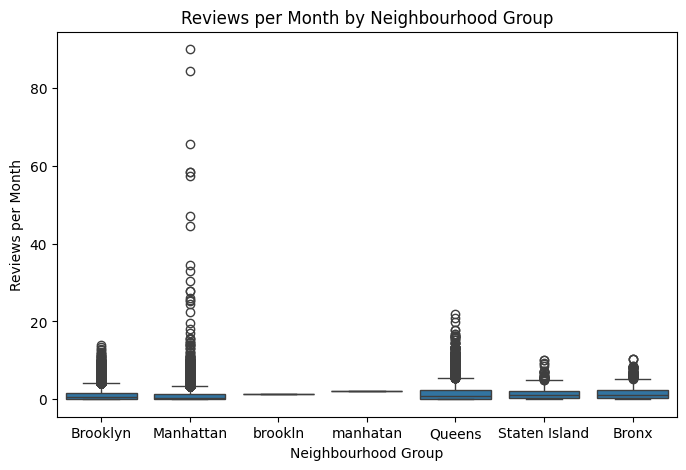

In [32]:
# Univariate Histogram
plt.figure(figsize=(8,5))
sns.histplot(df['reviews per month'].dropna(), bins=20, kde=True, color='skyblue')
plt.title("Distribution of Reviews per Month")
plt.xlabel("Reviews per Month")
plt.ylabel("Frequency")
plt.show()

# Bivariate Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x='neighbourhood group', y='reviews per month', data=df)
plt.title("Reviews per Month by Neighbourhood Group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Reviews per Month")
plt.show()

# Chart-7: Overall Bookings(Neighbourhood Group vs Availability_365)

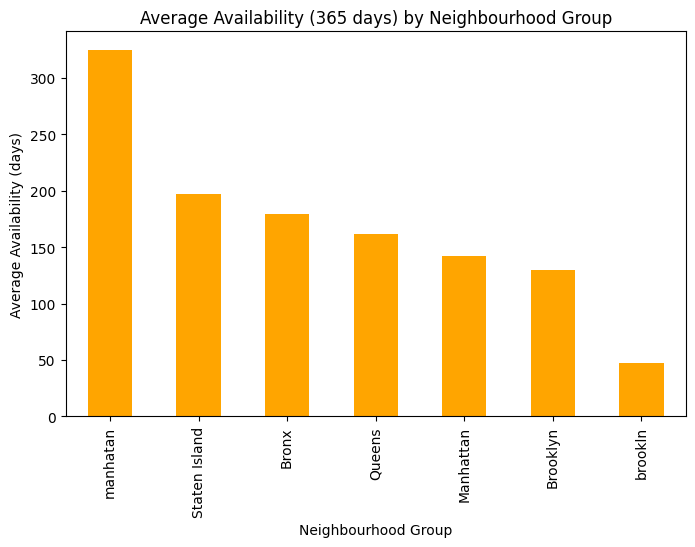

In [34]:
plt.figure(figsize=(8,5))
df.groupby('neighbourhood group')['availability 365'].mean().sort_values(ascending=False).plot(kind='bar', color='orange')
plt.title("Average Availability (365 days) by Neighbourhood Group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Average Availability (days)")
plt.show()

# Chart-8: Room Type vs Minimum Nights

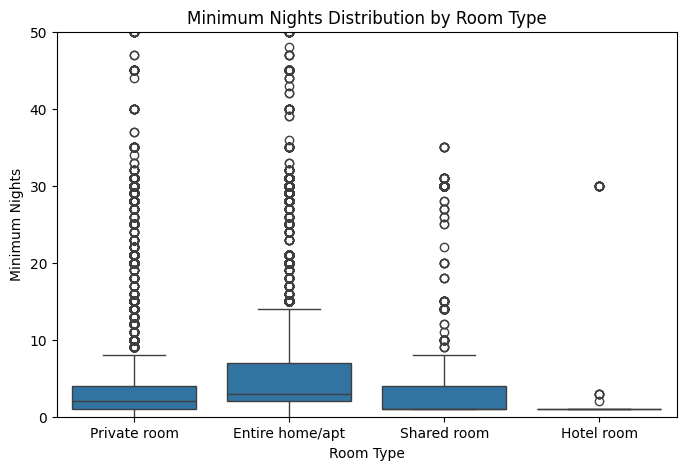

In [35]:
plt.figure(figsize=(8,5))
sns.boxplot(x='room type', y='minimum nights', data=df)
plt.title("Minimum Nights Distribution by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Minimum Nights")
plt.ylim(0, 50)
plt.show()

# Chart-9: Column-wise Histogram & Box Plot

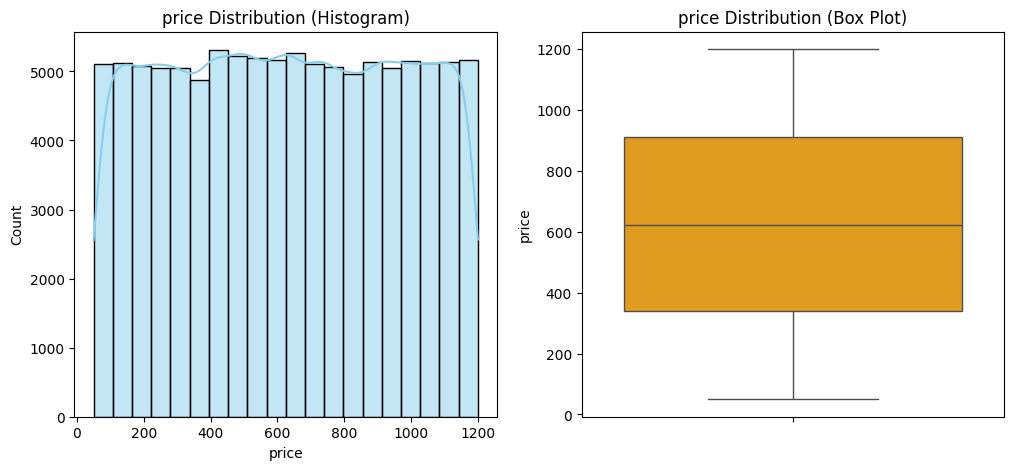

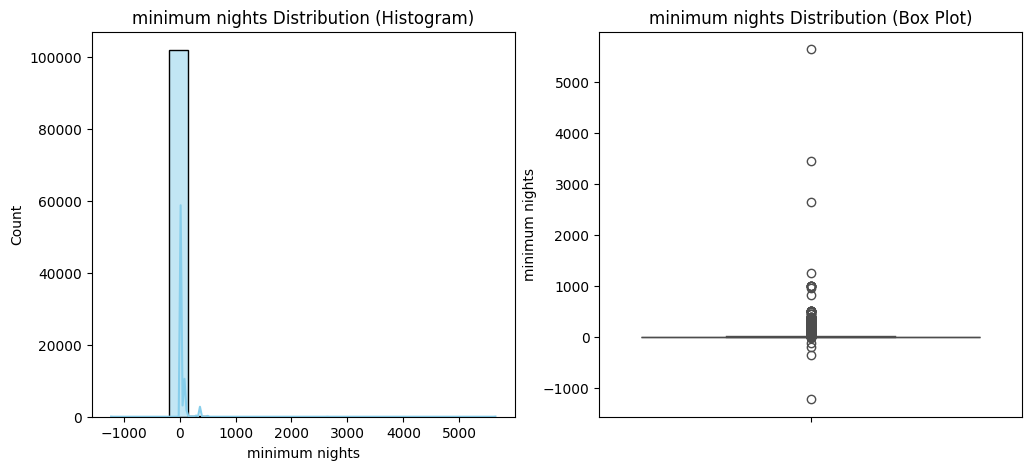

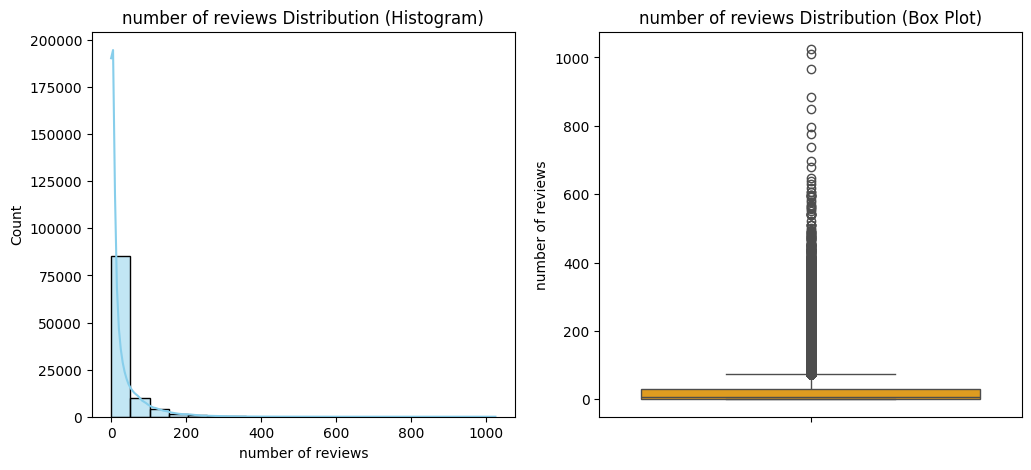

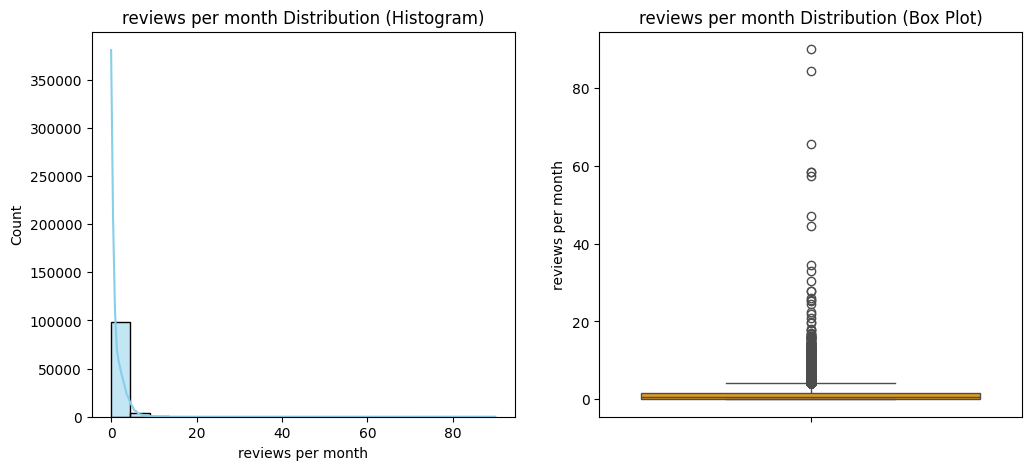

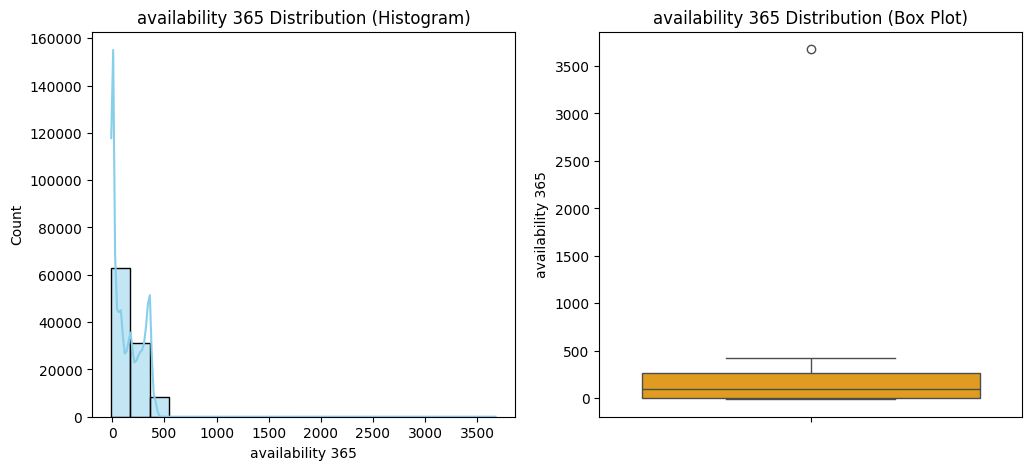

In [38]:
numerical_cols = ['price','minimum nights','number of reviews','reviews per month','availability 365']

for col in numerical_cols:
    plt.figure(figsize=(12,5))

    # Histogram
    plt.subplot(1,2,1)
    sns.histplot(df[col].dropna(), bins=20, kde=True, color='skyblue')
    plt.title(f'{col} Distribution (Histogram)')

    # Box Plot
    plt.subplot(1,2,2) # Changed from 3 to 2
    sns.boxplot(y=df[col], color='orange')
    plt.title(f'{col} Distribution (Box Plot)')

    plt.show()

# Chart-10: Correlation Heatmap

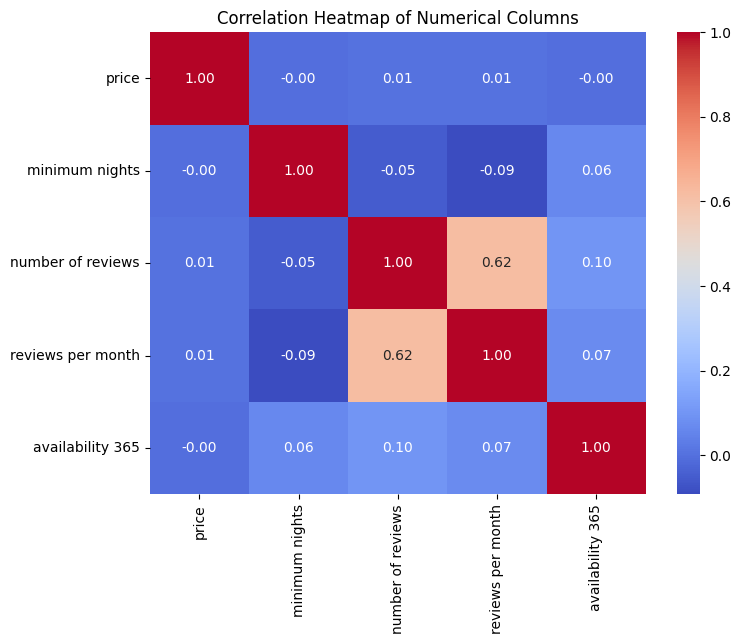

In [39]:
plt.figure(figsize=(8,6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Columns")
plt.show()

# Chart-11: Pair Plot

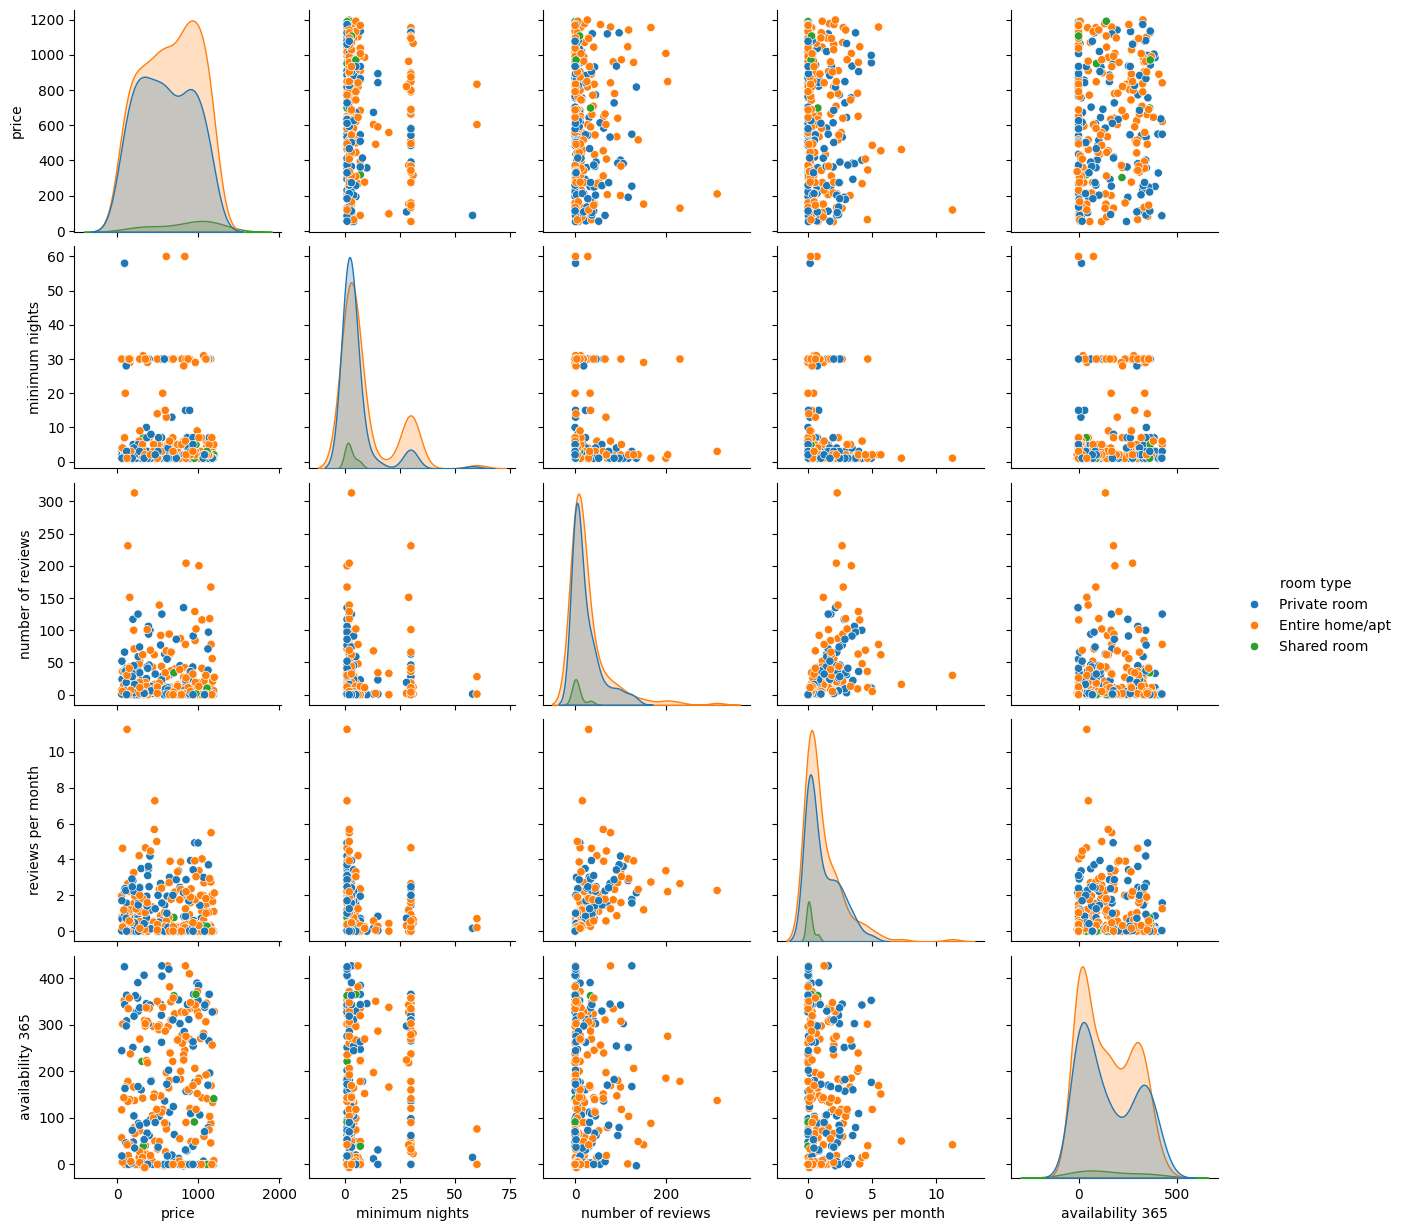

In [41]:
sample_df = df[numerical_cols + ['room type']].dropna().sample(300, random_state=42)
sns.pairplot(sample_df, diag_kind='kde', hue='room type')
plt.show()